In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({'font.size': 15})

#G=Goal, OG=Own Goal, Y=Yellow Card, R=Red Card, SY = Red Card by second yellow, P=Penalty, MP=Missed Penalty, I = Substitution In, O=Substitute Out, IH= In half time?

df_matches = pd.read_csv('data_raw/WorldCupMatches.csv', sep=',')
df_players = pd.read_csv('data_raw/WorldCupPlayers.csv', sep=',')
df_cups = pd.read_csv('data_raw/WorldCups.csv', sep=',')

df_events = pd.read_csv('data_prepared/event.csv', sep=',').replace(np.nan, '', regex=True)

# General information about Football World Cups

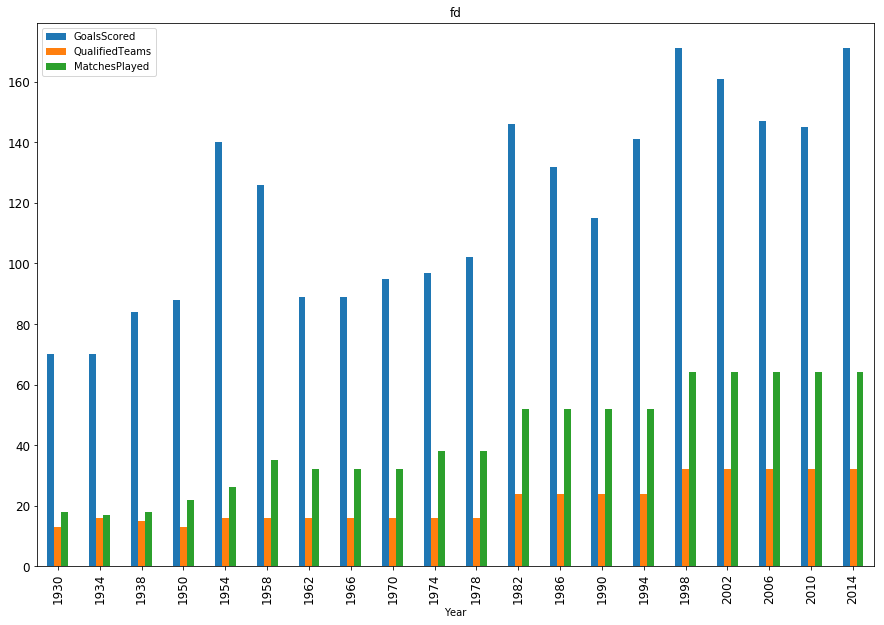

In [3]:
df_cups.set_index('Year').plot(kind='bar', title="fd", figsize=(15, 10), legend=True, fontsize=12)

# Attendance per World Cup

In [4]:
# Data preparation
df_cups_attendance = df_cups[["Year", "Attendance"]]
df_cups_attendance['Attendance'] = df_cups_attendance['Attendance'].str.replace('.', '')

df_cups_attendance.dtypes
df_cups_attendance['Attendance'] = df_cups_attendance.Attendance.astype(float)
df_cups_attendance.dtypes

C:\Users\D064012\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\D064012\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Year            int64
Attendance    float64
dtype: object

<Figure size 864x432 with 0 Axes>

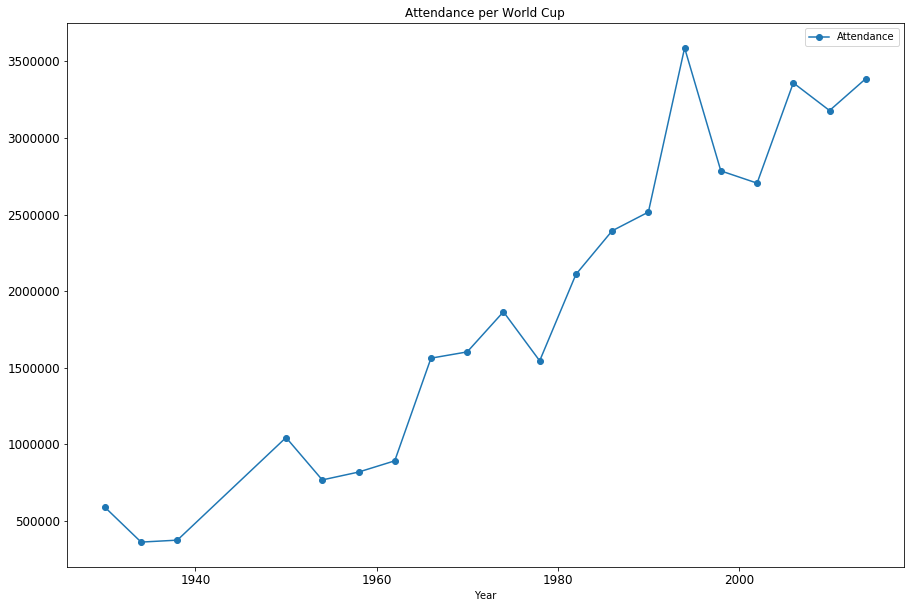

In [5]:
plt.figure(figsize=(12,6))
df_cups_attendance.set_index("Year").plot(style="o-", title="Attendance per World Cup", figsize=(15, 10), legend=True, fontsize=12)
plt.show()


# Player with the most goals across all World Cups

In [6]:
df_players

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN
5,201,1096,MEX,LUQUE Juan (MEX),S,0,Rafael GARZA,C,NaN
6,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Andre MASCHINOT,NaN,G43' G87'
7,201,1096,MEX,LUQUE Juan (MEX),S,0,Hilario LOPEZ,NaN,NaN
8,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Etienne MATTLER,NaN,NaN
9,201,1096,MEX,LUQUE Juan (MEX),S,0,Dionisio MEJIA,NaN,NaN


In [12]:
df_players_goals = df_players[["Player Name", "Event"]]

In [32]:
# Delete NA Lines
df_players_goals.dropna()

,Player Name,Event
2,Marcel LANGILLER,G40'
3,Juan CARRENO,G70'
6,Andre MASCHINOT,G43' G87'
74,PREGUINHO,G62'
587,Jim BROWN,G89'
664,Carlos PEUCELLE,G20'
981,Oldrich NEJEDLY,G67'
1053,Karl HOHMANN,G60' G63'
1056,Gosta DUNKER,G82'
1441,Geza TOLDI,G15'


In [33]:
df_players_goals = df_players_goals.loc[(df_events['EventType'] == 'G')]

In [34]:
df_players_goals.groupby(['Player Name'])
df_players_goals = df_players_goals[pd.notnull(df_players_goals['Event'])]

In [39]:
# Get only players with goals
df_players_goals = df_players_goals[df_players_goals.Event.str.contains("G") == True]
df_players_goals = df_players_goals[df_players_goals.Event.str.contains("P") == False]
df_players_goals = df_players_goals[df_players_goals.Event.str.contains("I") == False]
df_players_goals = df_players_goals[df_players_goals.Event.str.contains("Y") == False]
df_players_goals = df_players_goals[df_players_goals.Event.str.contains("R") == False]
df_players_goals

,Player Name,Event
2,Marcel LANGILLER,G40'
3,Juan CARRENO,G70'
6,Andre MASCHINOT,G43' G87'
74,PREGUINHO,G62'
587,Jim BROWN,G89'
664,Carlos PEUCELLE,G20'
981,Oldrich NEJEDLY,G67'
1053,Karl HOHMANN,G60' G63'
1056,Gosta DUNKER,G82'
1441,Geza TOLDI,G15'


In [47]:
# calculate total goals of every player
total_goals = df_players_goals[['Event']].applymap(lambda x: str.count(x, 'G'))

# Adding a new 'total goals' column
df_players_goals['Total Goals'] = total_goals

# sort descending
df_players_goals.sort_values(by='Total Goals', ascending=False)

,Player Name,Event,Total Goals
3609,Sandor KOCSIS,G3' G21' G69' G78',4
9323,Gerd MUELLER,G19' G26' G39',3
16569,Preben ELKJAER LARSEN,G11' G67' G80',3
24136,MORIENTES,G55' G81',2
1481,Jean NICOLAS,G16' G69',2
6515,AMARILDO,G72' G86',2
8972,Teofilo CUBILLAS,G65' G75',2
6781,Giacomo BULGARELLI,G65' G67',2
6,Andre MASCHINOT,G43' G87',2
11120,Johan CRUYFF,G10' G90',2


In [60]:
# calculate total goals of every player
players = df_players[df_players['Player Name'].str.contains("KLOSE")]
players.groupby( [ "Player Name"] )
players

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
25424,43950100,43950004,GER,VOELLER Rudi (GER),S,11,KLOSE,NaN,G20' G25' G70' O76'
26022,43950100,43950017,GER,VOELLER Rudi (GER),S,11,KLOSE,NaN,G19' O85'
26897,43950100,43950035,GER,VOELLER Rudi (GER),S,11,KLOSE,NaN,G79' O84'
27536,43950200,43950049,GER,VOELLER Rudi (GER),S,11,KLOSE,NaN,NaN
27906,43950300,43950058,GER,VOELLER Rudi (GER),S,11,KLOSE,NaN,O88'
28044,43950400,43950061,GER,VOELLER Rudi (GER),S,11,KLOSE,NaN,O70'
28182,43950600,43950064,GER,VOELLER Rudi (GER),S,11,KLOSE,NaN,Y9' O74'
28226,97410100,97410001,GER,J�rgen KLINSMANN (GER),S,11,KLOSE,NaN,G17' G61' O79'
28961,97410100,97410017,GER,J�rgen KLINSMANN (GER),S,11,KLOSE,NaN,NaN
29700,97410100,97410033,GER,J�rgen KLINSMANN (GER),S,11,KLOSE,NaN,G4' G44' O66'
